# <신용카드 거래 데이터 시각화>

* store_id: 각 파일에서의 상점 고유 번호
* date: 거래일자
* time: 거래시간
* card_id: 카드 번호의 hash 값
* amount: 매출액, 0보다 작은 음수는 거래 취소(환불)
* installments: 할부개월수, 일시불은 빈 문자열
* day_of_week: 요일, 월요일이0, 일요일은6
* holyday: 1이면 공휴일, 0이면 공휴일 아님

### 크게 시간, 식별화 코드, 매출 3가지로 구분

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:/Users/82102/Desktop/data04/train.csv')
train

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


In [3]:
print(train.shape)

(3362796, 8)


In [4]:
train.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


## 이상치 제거

In [5]:
train["temp"]=1

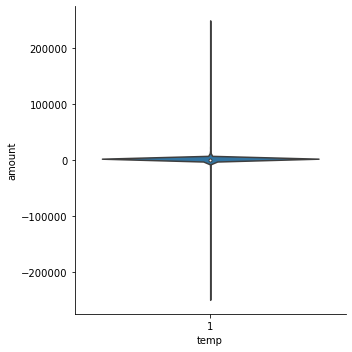

In [6]:
sns.catplot(data = train, x="temp", y="amount", kind="violin")

In [8]:
percentage_100 = np.percentile(train["amount"], 100)
print(percentage_100)

250000.0


### amount는 -250000 ~ 250000 범위를 가지며 분포 확인이 어려움

In [9]:
percentage_99 = np.percentile(train["amount"], 99)
print(percentage_99)

1335.0


In [10]:
percentage_98 = np.percentile(train["amount"], 98)
print(percentage_98)

800.0


#### amount가 갖는 영역에 비해 99와 98퍼센트 값은 훨씬 적은 값을 가짐.
#### 1000에서 약 98.5%의 데이터가 존재하므로 1000보다 큰 값, -1000보다 작은 값을 이상치로 제거

In [11]:
train = train.loc[(train["amount"]>=-1000) & (train["amount"] <=1000)]

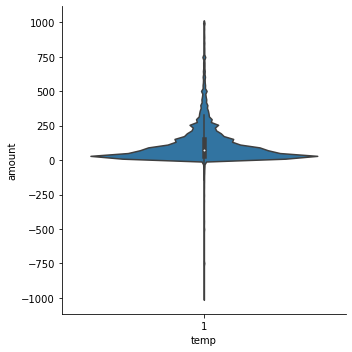

In [12]:
sns.catplot(data=train, x="temp", y="amount", kind="violin")

### 더 고르게 분포함

## 결측치 제거

In [13]:
train.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

### installments의 결측치를 1로 대체한다. (일시불)

In [13]:
train['installments']= train['installments'].fillna(1)

In [14]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,temp
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,1
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,1
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,1
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,1
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,1


In [15]:
train.isnull().sum()

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
temp            0
dtype: int64

### Total컬럼 만들기

In [16]:
train["total"] =train["amount"] * train["installments"]

In [17]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,temp,total
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,1,5.0
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,1,-5.0
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,1,144.0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,1,66.0
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,1,24.0


In [18]:
del train["temp"]

### 상관관계 분석 시각화

In [19]:
plt.figure(figsize = (10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

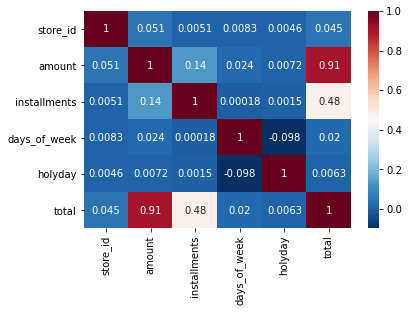

In [20]:
sns.heatmap(train[train.columns].corr(), cmap="RdBu_r", annot=True)

## 1. store_id- count

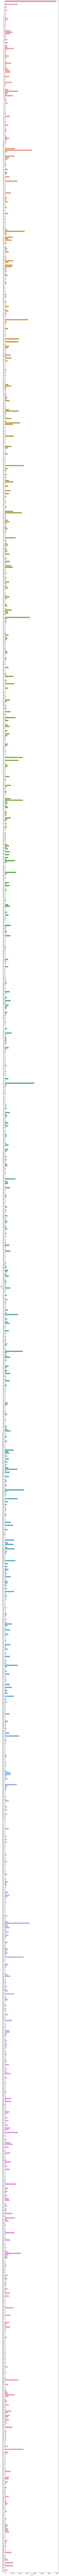

In [21]:
figure, ax=plt.subplots()
figure.set_size_inches(10,500)
sns.countplot(data=train, y="store_id")

In [22]:
count_list=[]
for i in range(1799):
    train_temp =train.loc[train["store_id"] == i]
    values = {"count": train_temp.shape[0]}
    count_list.append(values)

In [23]:
count_list = pd.DataFrame.from_dict(count_list)
count_list = count_list.sort_values(by="count", ascending= False)
count_list.index.name = "store_id"

### 거래 기록 많은 상위 10개 가게

In [24]:
count_list.head(10)

,count
store_id,
0,68715
753,39217
105,35999
1342,33325
428,33281
221,31404
161,26108
1038,25694
323,25219


### 거래 기록 적은 상위 10개 가게

In [25]:
count_list.tail(10)

,count
store_id,
951,0
617,0
1600,0
601,0
255,0
11,0
1681,0
1216,0
506,0


#### 거래 기록이 이루어지지 않음

In [26]:
count_list_0 = count_list.loc[count_list["count"]==0]
count_list_0.shape[0]

55

#### 거래 기록이 이루어지지 않은 가게는 총 55개

## 2. store_id - total

In [27]:
total_list = []
for i in range(1799):
    train_temp = train.loc[train["store_id"] == i]
    values = {"total": train_temp["total"].sum()}
    total_list.append(values)

In [28]:
total_list = pd.DataFrame.from_dict(total_list)
total_list = total_list.sort_values(by="total", ascending= False)
total_list.index.name = "store_id"

### 매출액 상위 10개 가게의 store_id

In [29]:
total_list.head(10)

,total
store_id,
753,9353275.0
1342,7392831.0
0,5318111.0
161,4624716.0
1076,3781650.0
1024,2962918.0
104,2960875.0
1209,2863403.0
597,2787632.0


### 매출액 하위 10개 가게의 store_id

## 3. 시간

In [30]:
def split_date(date):
    return date.split("-")

In [31]:
train["year"], train["month"], train["day"] = zip(*train['date'].apply(lambda x: split_date(x)))

In [32]:
def split_time(time):
    return time.split(":")

In [34]:
train["hour"], train["minute"], train["second"] = zip(*train['time'].apply(lambda x: split_time(x)))

In [35]:
train["year"] = train["year"].astype(int)
train["month"] = train["month"].astype(int)
train["day"] = train["day"].astype(int)
train["hour"] = train["hour"].astype(int)
train["minute"] = train["minute"].astype(int)
train["second"] = train["second"].astype(int)

In [36]:
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,total,year,month,day,hour,minute,second
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,5.0,2016,12,14,18,5,31
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,-5.0,2016,12,14,18,5,54
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,144.0,2016,12,19,12,42,31
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,66.0,2016,12,19,12,48,8
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,24.0,2016,12,19,13,31,8


### 시간 - year

* 연도별 평균 총액

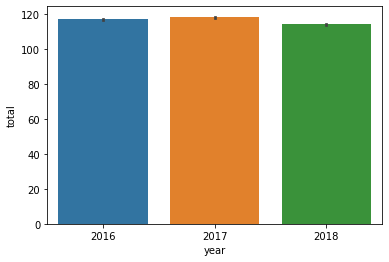

In [37]:
sns.barplot(data=train, x="year", y="total")

#### 2017>2016>2018

### 시간 - month

* 월별 평균 총액

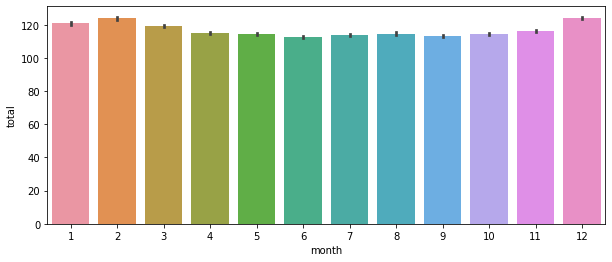

In [38]:
figure, ax=plt.subplots()
figure.set_size_inches(10,4)
sns.barplot(data = train, x="month", y="total")

#### 12월에 가장 높고, 6월에 가장 낮음

### 시간 - day

* 시간별 평균 총액

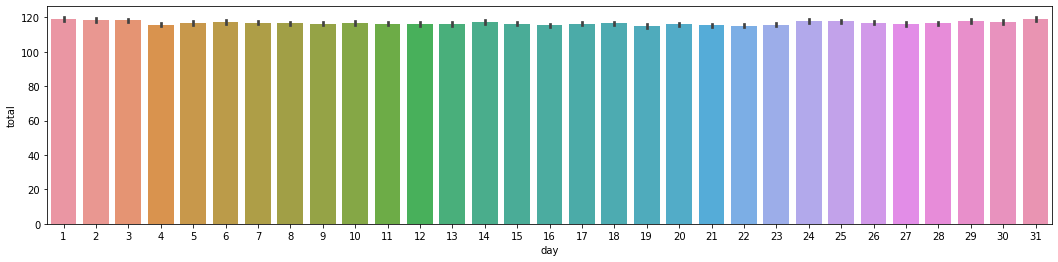

In [39]:
figure, ax=plt.subplots()
figure.set_size_inches(18,4)
sns.barplot(data = train, x="day", y="total")

#### 월초, 월초가 가장 높음

### 시간 - days_of_week

* 요일별 평균 매출 총액

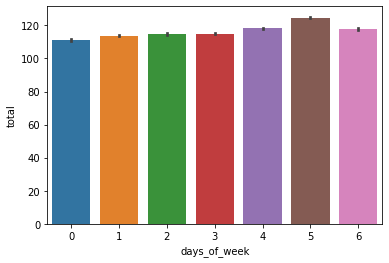

In [40]:
sns.barplot(data= train, x="days_of_week", y="total")

#### 토요일이 가장 높음

* holyday을 고려한 요일별 매출 총액

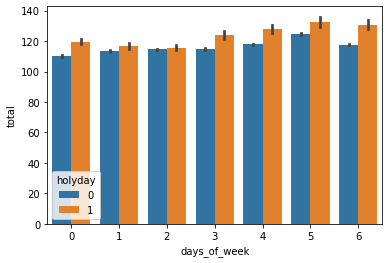

In [41]:
sns.barplot(data=train, x="days_of_week", y="total", hue="holyday")

#### 평일에 비해 공휴일에 평균 매출 총액이 높음

### 시간 - hour

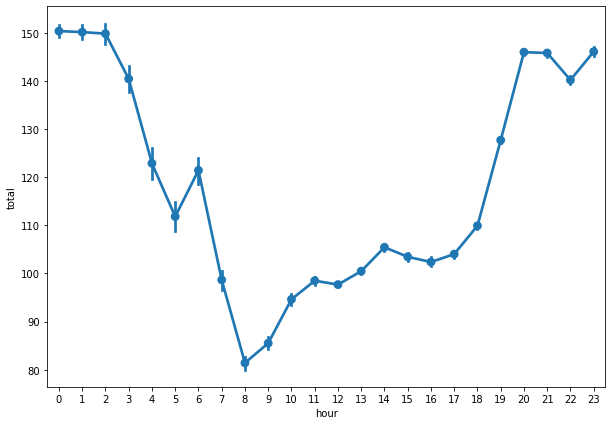

In [42]:
plt.figure(figsize=(10,7))
sns.pointplot(data= train, x="hour", y="total")

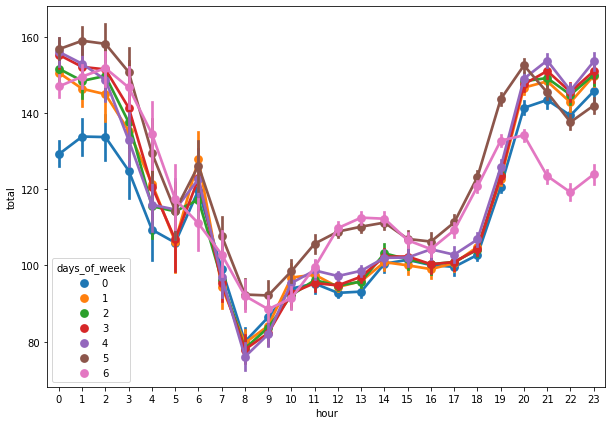

In [43]:
plt.figure(figsize=(10,7))
sns.pointplot(data= train, x="hour", y="total", hue="days_of_week")

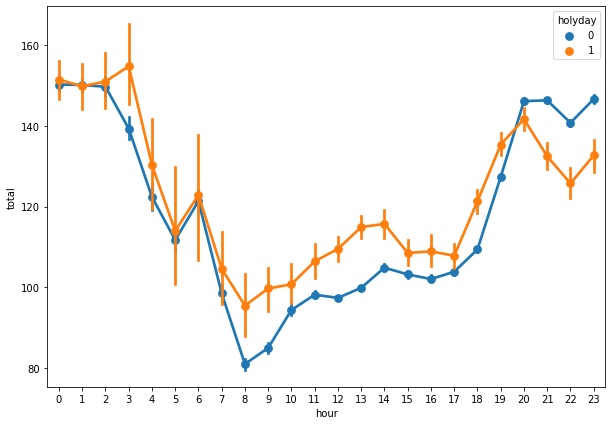

In [44]:
plt.figure(figsize=(10,7))
sns.pointplot(data= train, x="hour", y="total", hue="holyday")

## 4. amount

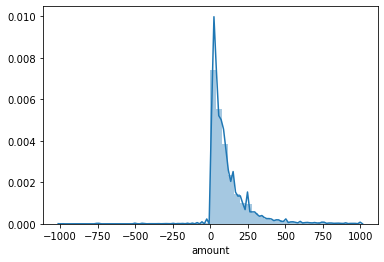

In [45]:
sns.distplot(train["amount"])

## 5. total, installments

In [48]:
total_over0 = train.loc[train["total"] >=0]

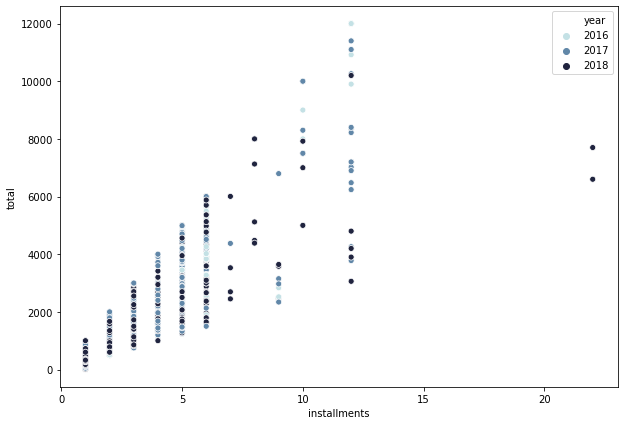

In [50]:
camp = sns. cubehelix_palette(rot=-0.2, as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data=total_over0, x="installments", y="total", hue="year", palette=camp)

#### total 총액이 높을 수록 계산의 분활 횟수가 많음